In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df=pd.read_csv("laptop_data.csv")

In [3]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# find duplicated values
df.duplicated().sum()

0

In [7]:
# find missing values

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# remove unwanted col

df.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
df['Ram']=df['Ram'].str.replace("GB","")
df['Weight']=df['Weight'].str.replace('kg','')

In [10]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


## EDA

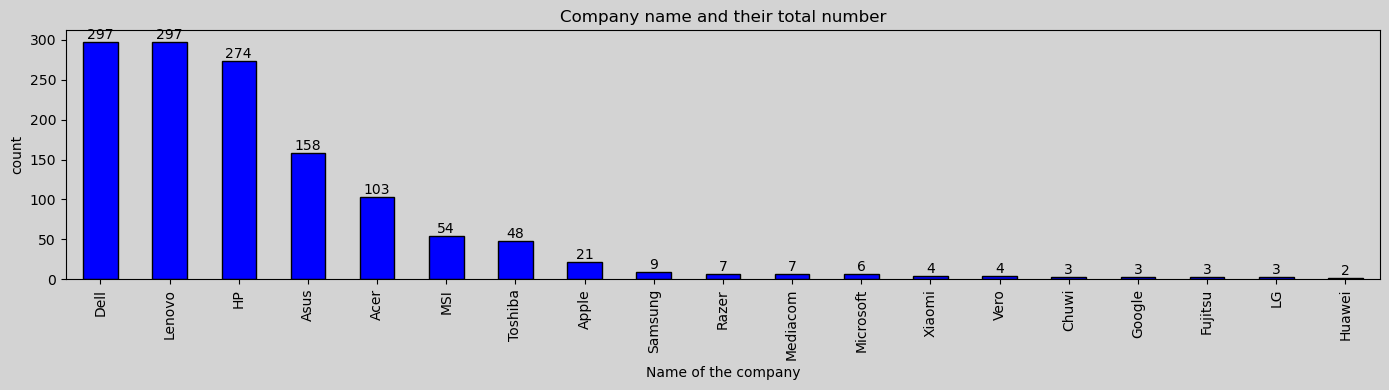

In [13]:
# find numbers of laptop for each brand
plt.figure(figsize=(14,4),facecolor='lightgray')
ax=df['Company'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Company name and their total number")
plt.xlabel("Name of the company")
plt.ylabel("count")
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()


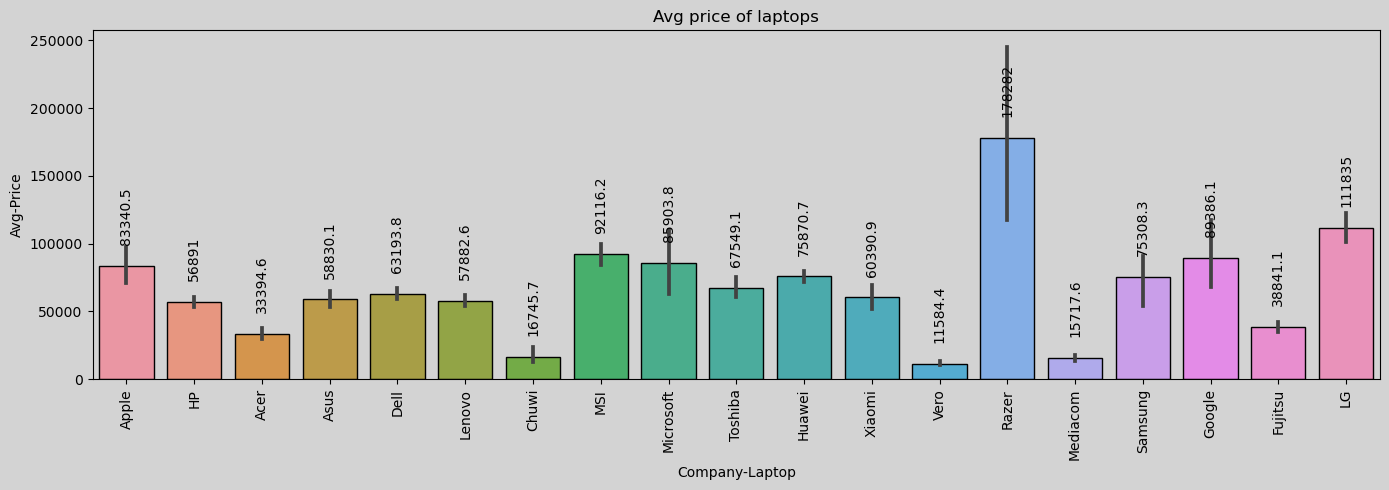

In [14]:
# brand wise avg price
plt.figure(figsize=(14,5),facecolor='lightgray')
ax=sns.barplot(x=df['Company'],y=df['Price'],edgecolor='black')
ax.bar_label(ax.containers[0],rotation='vertical' ,padding=15)
plt.xticks(rotation='vertical')
plt.title("Avg price of laptops")
plt.xlabel("Company-Laptop")
plt.ylabel("Avg-Price")
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()
plt.show()

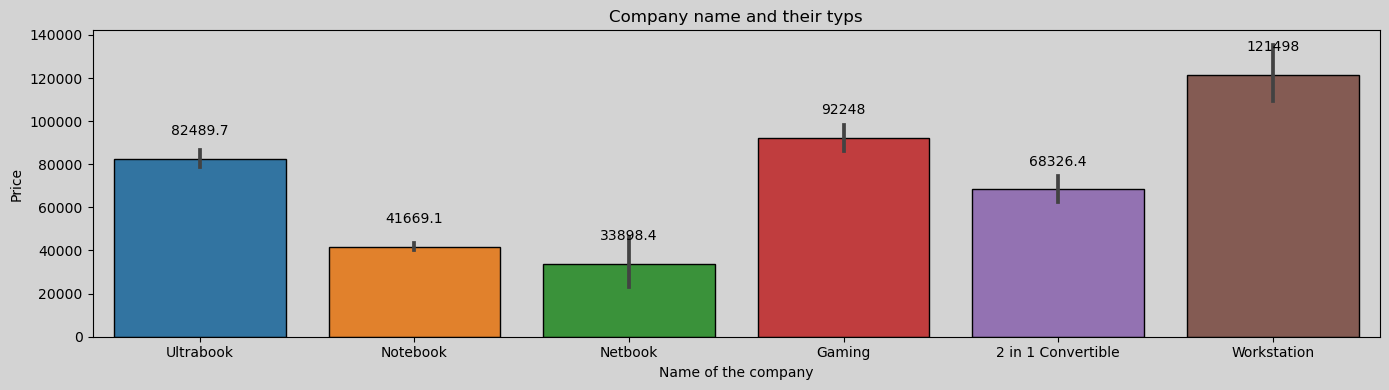

In [15]:
# find numbers of laptop and types
plt.figure(figsize=(14,4),facecolor='lightgray')
ax=sns.barplot(x=df['TypeName'],y=df['Price'], edgecolor='black')
ax.bar_label(ax.containers[0] ,padding=15)
plt.title("Company name and their typs")
plt.xlabel("Name of the company")
plt.ylabel("Price")
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()
plt.show()


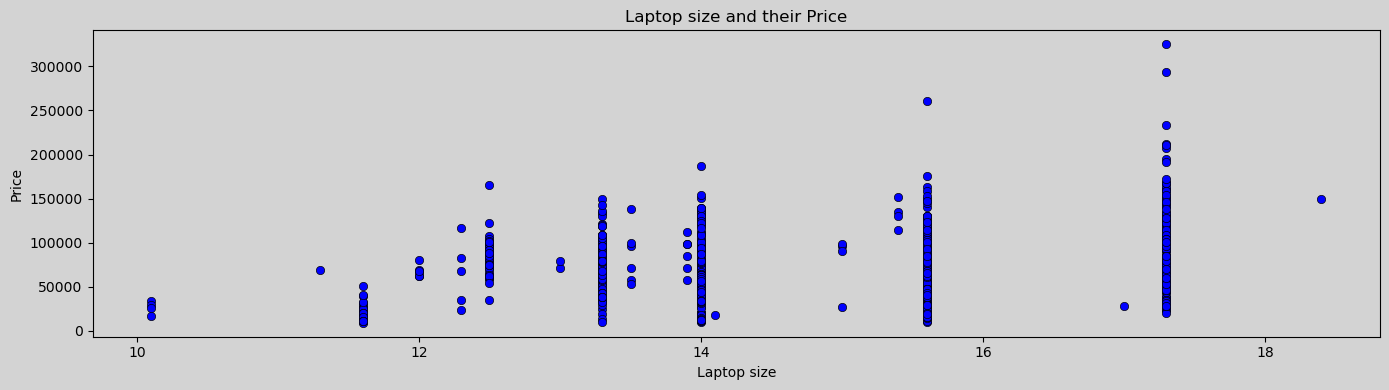

In [16]:
plt.figure(figsize=(14,4),facecolor='lightgray')
sns.scatterplot(x=df['Inches'],y=df['Price'], edgecolor='black', color='blue')
plt.title("Laptop size and their Price")
plt.xlabel("Laptop size")
plt.ylabel("Price")
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [17]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [18]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
757,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,83170.08,0
964,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,45101.52,0
1166,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,74059.20,0


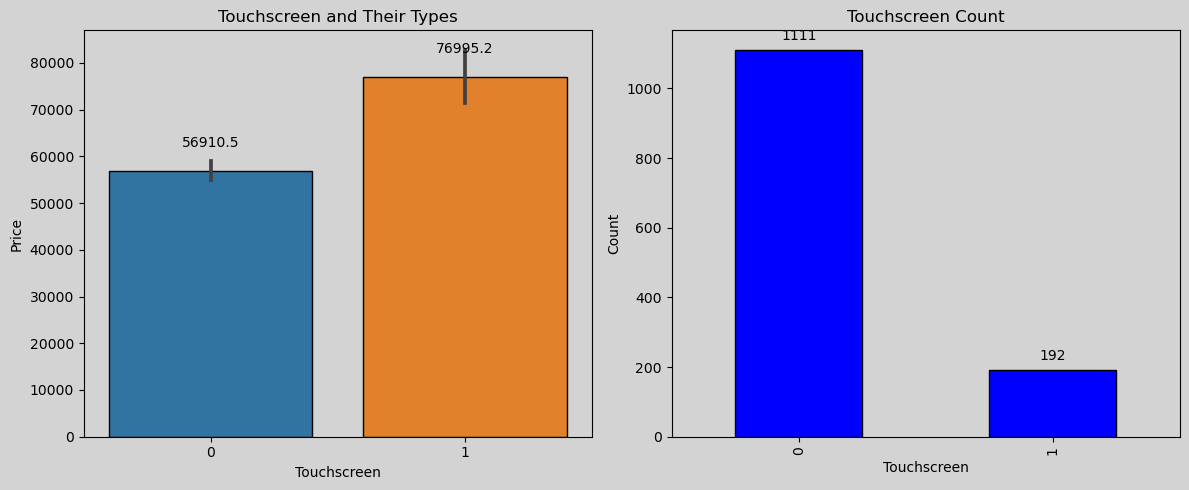

In [19]:
# Create a 1x2 grid for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='lightgray')

# Plot 1: Price of touchscreen vs. non-touchscreen laptops
sns.barplot(x=df['Touchscreen'], y=df['Price'], edgecolor='black', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], padding=15)
axes[0].set_title("Touchscreen and Their Types")
axes[0].set_xlabel("Touchscreen")
axes[0].set_ylabel("Price")
axes[0].set_facecolor('lightgray')

# Plot 2: Price of touchscreen vs. non-touchscreen laptops
ax2 = df['Touchscreen'].value_counts().plot(kind='bar', color='blue', edgecolor='black', ax=axes[1])
ax2.bar_label(ax2.containers[0], padding=5)
ax2.set_title("Touchscreen Count")
ax2.set_xlabel("Touchscreen")
ax2.set_ylabel("Count")
ax2.set_facecolor('lightgray')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [20]:
df['IPS']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

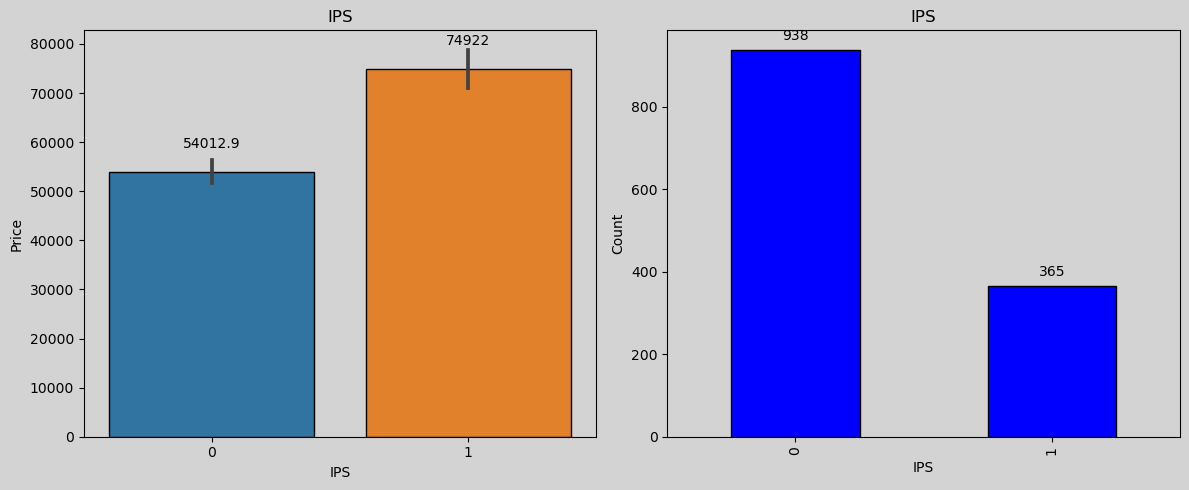

In [21]:
# Create a 1x2 grid for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='lightgray')

# Plot 1: Price of touchscreen vs. non-touchscreen laptops
sns.barplot(x=df['IPS'], y=df['Price'], edgecolor='black', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], padding=15)
axes[0].set_title("IPS")
axes[0].set_xlabel("IPS")
axes[0].set_ylabel("Price")
axes[0].set_facecolor('lightgray')

# Plot 2: Price of touchscreen vs. non-touchscreen laptops
ax2 = df['IPS'].value_counts().plot(kind='bar', color='blue', edgecolor='black', ax=axes[1])
ax2.bar_label(ax2.containers[0], padding=5)
ax2.set_title("IPS")
ax2.set_xlabel("IPS")
ax2.set_ylabel("Count")
ax2.set_facecolor('lightgray')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [22]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [23]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [24]:
df['x_res']=new[0]
df['y_res']=new[1]

In [25]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [26]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [27]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [29]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
415,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.30,31909.3920,0,0,1920,1080
1005,HP,Notebook,14.0,1366x768,Intel Core i5 6300U 2.4GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,1366,768
965,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,1366,768


In [30]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
price_corr = df_numeric.corr()['Price']  # Calculate correlation with 'Price'
print(price_corr)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64


In [31]:
df['ppi'] = (((df['x_res']**2) + (df['x_res']**2))**0.5/df['Inches']).astype('float')

In [32]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
price_corr = df_numeric.corr()['Price']  # Calculate correlation with 'Price'
print(price_corr)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.474973
Name: Price, dtype: float64


In [33]:
df.drop(columns=['Inches','x_res','y_res','ScreenResolution'],inplace=True)

In [34]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,193.949289
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,340.261910
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,137.986838
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,123.834341


In [35]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [36]:
df['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [37]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [39]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

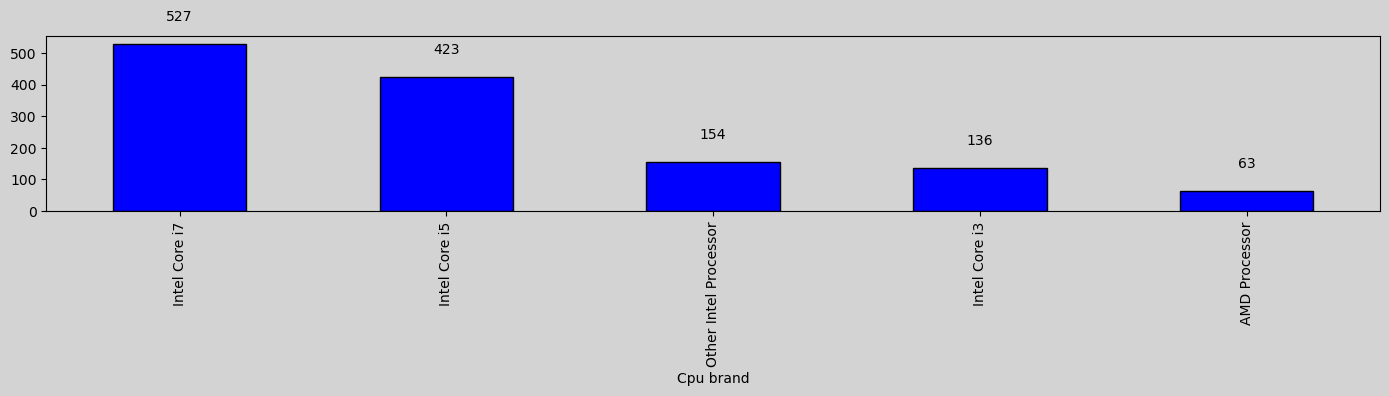

In [40]:
plt.figure(figsize=(14,4),facecolor='lightgray')
ax=df['Cpu brand'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
ax.bar_label(ax.containers[0],padding=15)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

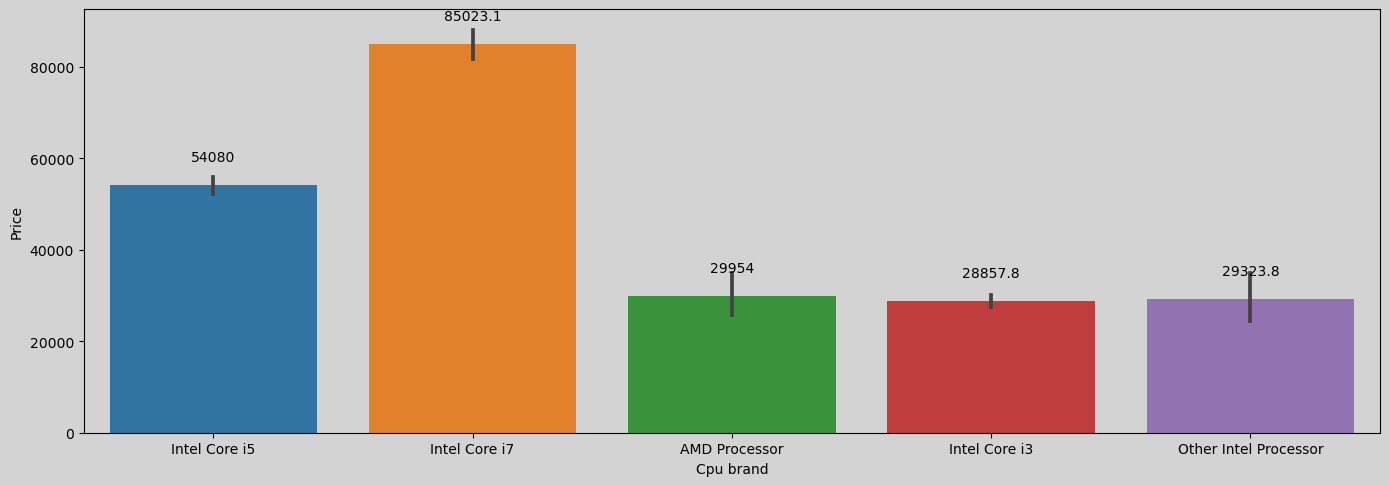

In [41]:
plt.figure(figsize=(14,5),facecolor='lightgray')
ax=sns.barplot(x=df['Cpu brand'],y=df['Price'])
ax.bar_label(ax.containers[0],padding=15)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [42]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

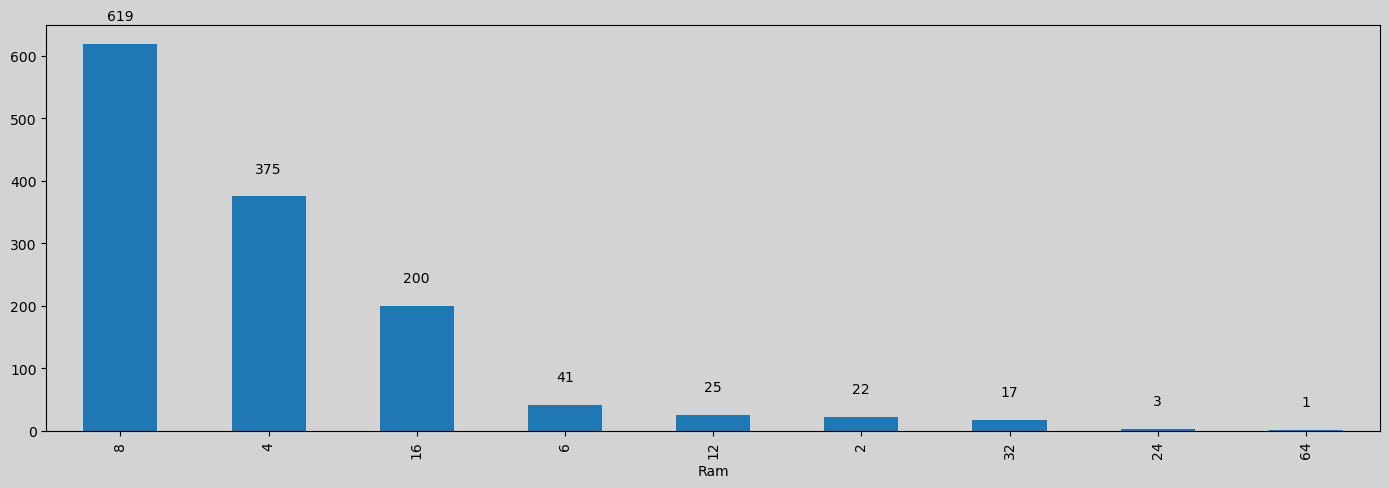

In [43]:
plt.figure(figsize=(14,5),facecolor='lightgray')
ax=df['Ram'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0],padding=15)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

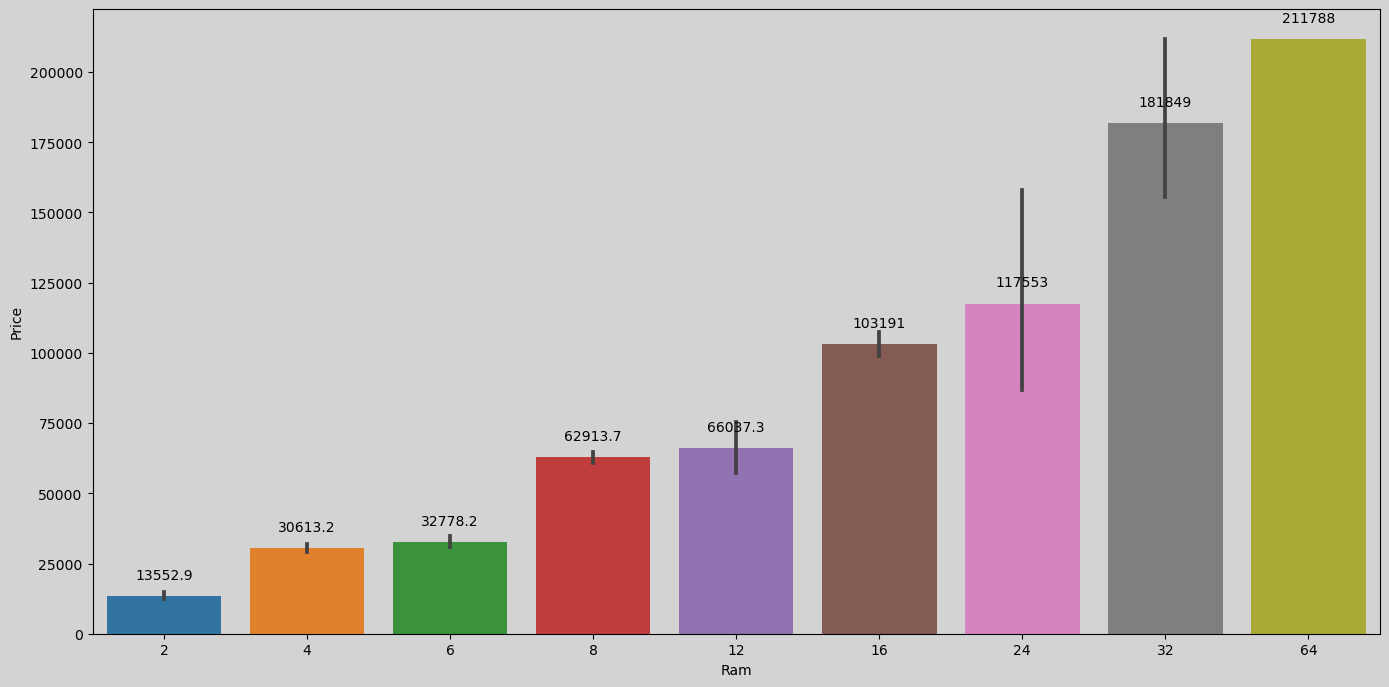

In [44]:


plt.figure(figsize=(14,7),facecolor='lightgray')
ax=sns.barplot(x=df['Ram'],y=df['Price'])
ax.bar_label(ax.containers[0],padding=10)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [45]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [46]:
# Step 1: Clean up the 'Memory' column by removing '.0', 'GB', and replacing 'TB' with '000' (to handle sizes consistently).
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Step 2: Split 'Memory' column into two parts using "+" as separator. Fill missing values with "0" if there's no second part.
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()  # 'first' column with cleaned data
df["second"] = new[1].fillna("0").str.strip()  # 'second' column with cleaned data and no NaNs

# Step 3: Create binary indicator columns for different storage types in the 'first' part.
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 4: Remove non-numeric characters from 'first' column to keep only storage size values.
df['first'] = df['first'].str.replace(r'\D', '', regex=True).replace('', '0').astype(int)  # Fill empty strings with '0' and convert to int

# Step 5: Create binary indicator columns for different storage types in the 'second' part.
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 6: Remove non-numeric characters from 'second' column to keep only storage size values.
df['second'] = df['second'].str.replace(r'\D', '', regex=True).replace('', '0').astype(int)  # Fill empty strings with '0' and convert to int

# Step 7: Calculate the total storage for each type by multiplying storage size with the corresponding binary indicator columns.
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Step 8: Drop unnecessary columns.
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [47]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1273,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,123.834341,Intel Core i7,1000,0,0,0
711,Dell,Notebook,8,256 SSD,Nvidia GeForce 930MX,Linux,1.64,58021.9200,0,0,193.949289,Intel Core i5,0,256,0,0
769,Acer,Notebook,4,1000 HDD,Intel HD Graphics 505,Linux,2.10,15877.4400,0,0,123.834341,Other Intel Processor,1000,0,0,0
1244,HP,Notebook,4,256 SSD,Intel HD Graphics 520,Windows 7,1.54,58607.4672,0,0,193.949289,Intel Core i5,0,256,0,0
1146,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.26,122381.4960,0,0,217.223203,Intel Core i7,0,256,0,0


In [48]:
df.drop(columns=['Memory'],inplace=True)

In [49]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
price_corr = df_numeric.corr()['Price']  # Calculate correlation with 'Price'
print(price_corr)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.474973
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [50]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [51]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [53]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [54]:
df = df[df['Gpu brand'] != 'ARM']

In [55]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

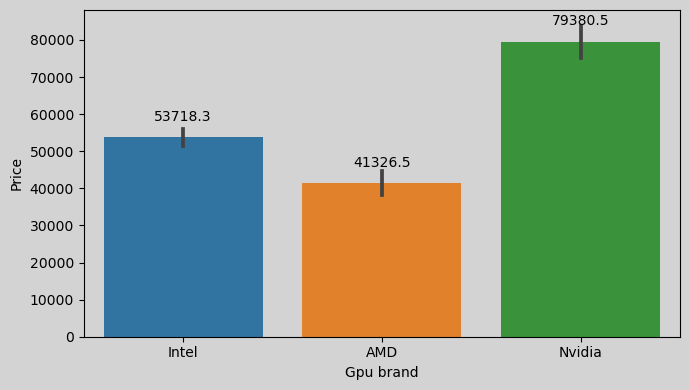

In [56]:

plt.figure(figsize=(7,4),facecolor='lightgray')
ax=sns.barplot(x=df['Gpu brand'],y=df['Price'])
ax.bar_label(ax.containers[0],padding=10)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [57]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19912\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [58]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel


In [59]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

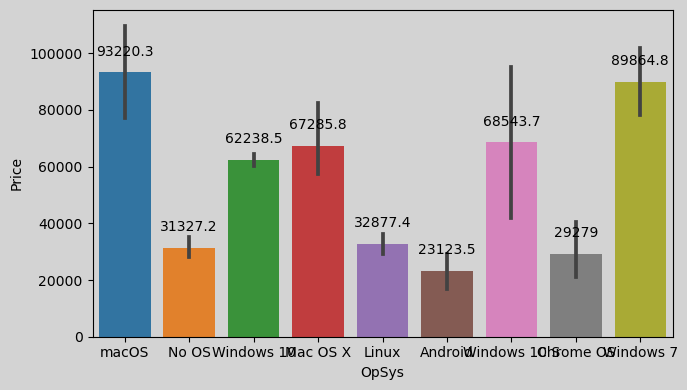

In [60]:
plt.figure(figsize=(7,4),facecolor='lightgray')
ax=sns.barplot(x=df['OpSys'],y=df['Price'])
ax.bar_label(ax.containers[0],padding=10)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [61]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [62]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19912\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [63]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel,Mac


In [64]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19912\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


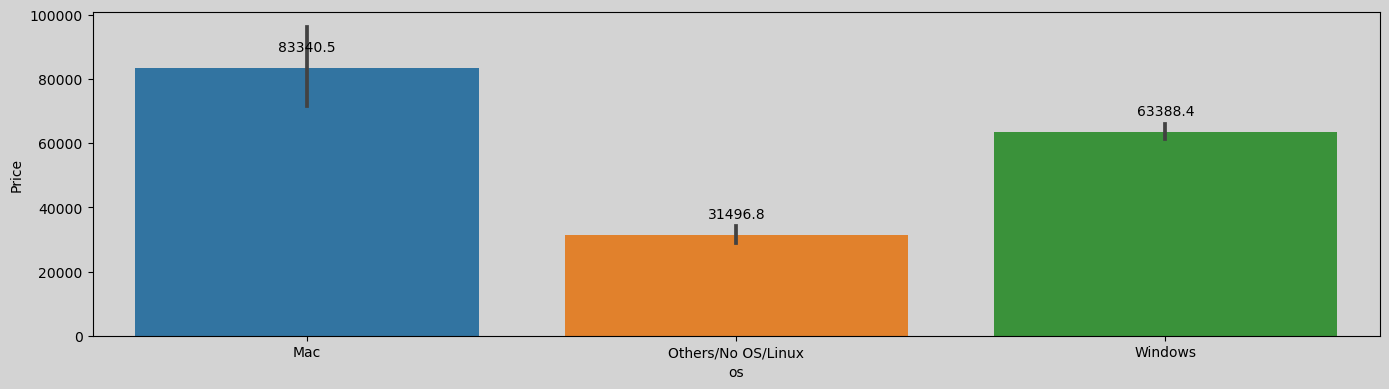

In [65]:
plt.figure(figsize=(14,4),facecolor='lightgray')
ax=sns.barplot(x=df['os'],y=df['Price'])
ax.bar_label(ax.containers[0],padding=10)
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19912\2960451604.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['Weight'])


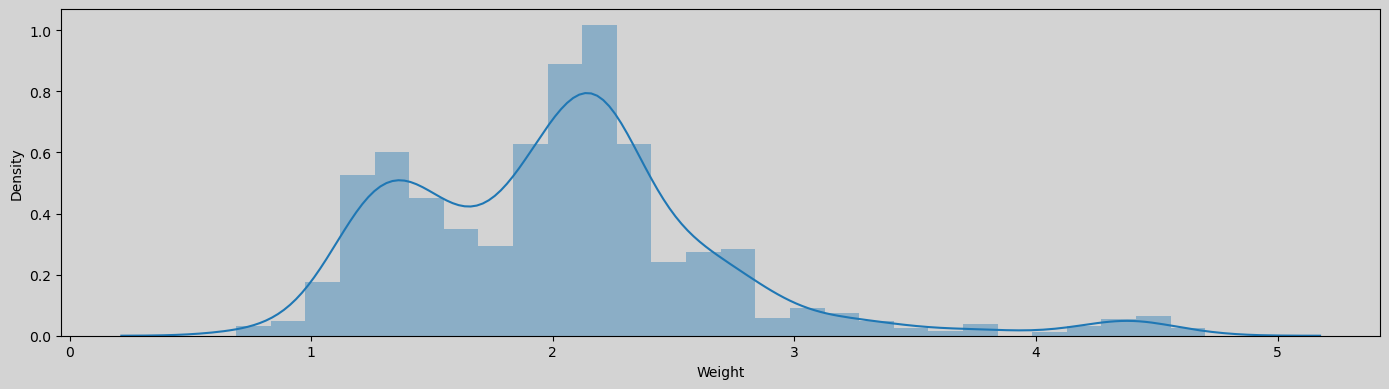

In [66]:

plt.figure(figsize=(14,4),facecolor='lightgray')
ax=sns.distplot(df['Weight'])
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

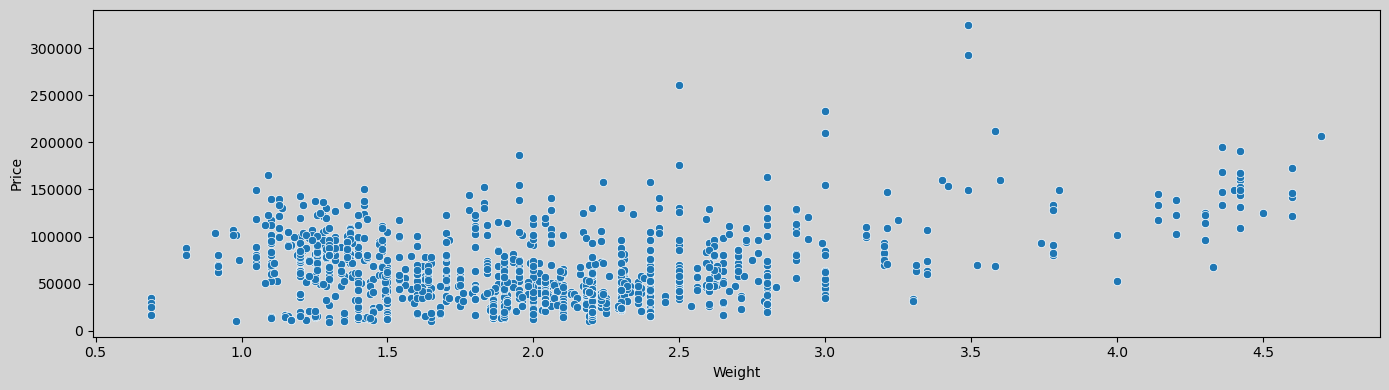

In [67]:
plt.figure(figsize=(14,4),facecolor='lightgray')
ax=sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [68]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
price_corr = df_numeric.corr()['Price']  # Calculate correlation with 'Price'
print(price_corr)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.476578
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19912\3890007823.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(np.log(df['Price']))


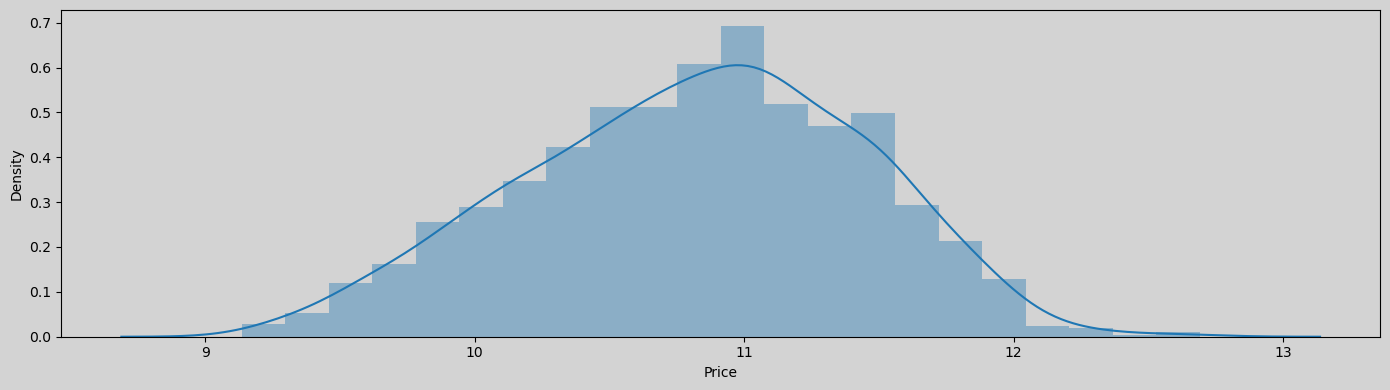

In [69]:

plt.figure(figsize=(14,4),facecolor='lightgray')
ax=sns.distplot(np.log(df['Price']))
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

In [70]:
x= df.drop(columns=['Price'])
y = np.log(df['Price'])

In [71]:
x=df.drop(columns=['Price'])
y=df['Price']

In [72]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [74]:
x_train 

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,123.834341,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,174.057054,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,166.535838,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,174.057054,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,174.057054,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,123.834341,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,174.057054,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,123.834341,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,123.834341,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [76]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear regression

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7178097579867616
MAE 12540.0522305806


## Ridge Regression

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7402065371219622
MAE 12095.866162433733


## Lasso Regression

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7178100912334355
MAE 12540.042241310059


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.705e+10, tolerance: 1.594e+08
  model = cd_fast.enet_coordinate_descent(


## Decision Tree

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7604095552725896
MAE 10817.404582104251


## SVM

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5440845594258801
MAE 15316.61712710855


## Random Forest

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8221754963583704
MAE 9204.193015916222


## AdaBoost

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6281759490498597
MAE 15897.449264451434


## Gradient Boost

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7864365328571975
MAE 9246.093813679852


## XgBoost

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7922717648395179
MAE 9333.925116175064
